Highlights

Cardiovascular disease (CVD) is one of the leading causes of death worldwide. Although the incidence of CVD in women is usually lower than in men, women have a higher mortality and worse prognosis after acute cardiovascular events. These gender differences exist in various CVDs, including coronary heart disease, stroke, heart failure and aortic diseases. These gender differences have caused widespread concerns and the consideration of gender differences is of great importance for the prevention, diagnosis, treatment and management of CVD. In patients with heart disease, mortality is lower in women versus men. However, it is unknown whether the survival advantage in women compared with men is present across different races.

The purpose of this project is to analyze heart rate mortality data for different counties across the US for the year 2014. 
Mortality is defined here as the number of deaths per 100,000 population.
We will explore variations according to: 

1. Gender (Male or Female)
2. Ethnicity (White, Hispanic, Black, Asian)

This analysis can assist in :

• Analyzing gender and racial differences in determination of the cardiovascular risk profile in order to develop personalized management plans for Heart Disease

• Clarify women-specific risk factors for cardiovascular disease and to provide a better understanding of Heart Disease in Females

In [82]:
import pandas as pd
import numpy as np



In [83]:
import os
os.path.isfile('/Users/Diwan/Heart_Disease_Mortality.csv')

True

In [84]:
os.getcwd()


'C:\\Users\\Diwan'

In [85]:
os.chdir('C:\\Users\\Diwan')

In [86]:
HDM = pd.read_csv("Heart_Disease_Mortality.csv")
HDM.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [110]:
# Selecting only the columns we need

cols = ['LocationDesc', 'Data_Value', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2','Stratification2'  ]
HDM = HDM[cols]
HDM = HDM[((HDM.Stratification2 != 'Overall') & (HDM.Stratification1 != 'Overall'))]


In [111]:
HDM.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
101,Aleutians West,349.306775,Gender,Male,Race/Ethnicity,White
102,Anchorage,317.500000,Gender,Male,Race/Ethnicity,White
103,Bethel,349.306775,Gender,Male,Race/Ethnicity,White
104,Bristol Bay,349.306775,Gender,Male,Race/Ethnicity,White
105,Denali,400.700000,Gender,Male,Race/Ethnicity,White


In [112]:
# Replace the missing values using the average values from that column.

HDM = HDM.fillna(HDM.mean())


In [113]:
HDM.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
101,Aleutians West,349.306775,Gender,Male,Race/Ethnicity,White
102,Anchorage,317.500000,Gender,Male,Race/Ethnicity,White
103,Bethel,349.306775,Gender,Male,Race/Ethnicity,White
104,Bristol Bay,349.306775,Gender,Male,Race/Ethnicity,White
105,Denali,400.700000,Gender,Male,Race/Ethnicity,White


In [114]:
HDM.isnull().sum()


LocationDesc               0
Data_Value                 0
StratificationCategory1    0
Stratification1            0
StratificationCategory2    0
Stratification2            0
dtype: int64

In [115]:
HDM['Data_Value'].groupby([HDM['Stratification1']]).mean()


Stratification1
Female    318.252853
Male      382.527610
Name: Data_Value, dtype: float64

In [116]:
HDM['Data_Value'].groupby([HDM['Stratification2']]).mean()


Stratification2
American Indian and Alaskan Native    360.544368
Asian and Pacific Islander            317.609253
Black                                 398.502918
Hispanic                              306.780209
White                                 368.514411
Name: Data_Value, dtype: float64

In [117]:
HDM['Data_Value'].groupby([HDM['LocationDesc']]).mean()


LocationDesc
Abbeville County    331.373387
Acadia Parish       421.064065
Accomack County     392.484065
Ada County          262.882710
Adair County        373.336734
                       ...    
Yukon-Koyukuk       348.164065
Yuma County         291.542710
Zapata County       336.464742
Zavala County       361.644065
Ziebach County      376.074065
Name: Data_Value, Length: 2015, dtype: float64

In [118]:
HDM['Data_Value'].groupby([HDM['Stratification1']]).describe()


,count,mean,std,min,25%,50%,75%,max
Stratification1,,,,,,,,
Female,16410.0,318.252853,77.639323,6.0,295.325000,349.306775,349.306775,1592.8
Male,16410.0,382.527610,115.959113,23.0,349.306775,349.306775,400.600000,1716.1


In [119]:
#sorting the male data from highest number of deaths to lowest
Males = HDM[HDM['Stratification1'] == 'Male']
Males_sorted = Males.sort_values("Data_Value", ascending = False)
Males_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
28360,Sioux County,1716.1,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
25033,Lauderdale County,1700.0,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
24999,Attala County,1544.6,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
28320,Adams County,1537.5,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
39298,Campbell County,1503.2,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native


In [120]:
#sorting the male data from lowest number of deaths to highest
Males_sorted = Males.sort_values("Data_Value")
Males_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
53683,Pitt County,23.0,Gender,Male,Race/Ethnicity,Hispanic
53199,Knox County,27.4,Gender,Male,Race/Ethnicity,Asian and Pacific Islander
59035,Woodbury County,45.2,Gender,Male,Race/Ethnicity,Hispanic
21505,Carver County,49.6,Gender,Male,Race/Ethnicity,Hispanic
34309,Love County,50.1,Gender,Male,Race/Ethnicity,Hispanic


In [121]:
#sorting the female data from highest number of deaths to lowest
Females = HDM[HDM['Stratification1'] == 'Female']
Females_sorted = Females.sort_values("Data_Value", ascending = False)
Females_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
15516,Cowley County,1592.8,Gender,Female,Race/Ethnicity,American Indian and Alaskan Native
25127,Neshoba County,1246.6,Gender,Female,Race/Ethnicity,American Indian and Alaskan Native
11851,Morgan County,986.8,Gender,Female,Race/Ethnicity,Black
17839,Franklin Parish,922.0,Gender,Female,Race/Ethnicity,White
25115,Lauderdale County,861.5,Gender,Female,Race/Ethnicity,American Indian and Alaskan Native


In [122]:
#sorting the female data from lowest number of deaths to highest
Females_sorted = Females.sort_values("Data_Value")
Females_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
55580,Sebastian County,6.0,Gender,Female,Race/Ethnicity,Hispanic
56004,Fayette County,13.2,Gender,Female,Race/Ethnicity,Asian and Pacific Islander
56092,Spotsylvania County,15.4,Gender,Female,Race/Ethnicity,Hispanic
27176,Orange County,17.0,Gender,Female,Race/Ethnicity,Hispanic
58386,Alamance County,17.2,Gender,Female,Race/Ethnicity,Hispanic


We can see from the above tables that the highest number of deaths have been of American Indian and Alaskan Native population, and the lowest have been for the Hispanic population for males and females both. 

It can be safely concluded that in the American population, the American Indian and Alaskan Native population is at highest risk and the Hispanic population is at the lowest risk of dying from heart diseases.

In [123]:
grouped = HDM.groupby('Stratification2')
race_grouped = grouped['Data_Value']
race_mean_max = race_grouped.agg([np.mean, np.max])
race_mean_max

,mean,amax
Stratification2,,
American Indian and Alaskan Native,360.544368,1716.1
Asian and Pacific Islander,317.609253,945.2
Black,398.502918,1357.3
Hispanic,306.780209,968.7
White,368.514411,1324.1


Text(0.5, 0, 'Mean Mortality Rate')

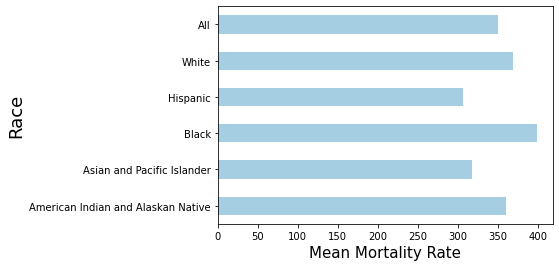

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

race = HDM.pivot_table(values='Data_Value', index='Stratification2', aggfunc=np.mean, margins=True)
race.plot(kind='barh', legend=False, colormap='Paired')
mean_value = HDM['Data_Value'].mean()
plt.ylabel('Race', fontsize = 18)
plt.xlabel('Mean Mortality Rate', fontsize = 15)

Finding the mean of total deaths for the year 2014 shows that the most overall deaths have been for the Black population, followed by White and then American Indian and Alaskan Native. THe lowest number of deaths have been for Hispanic population. 

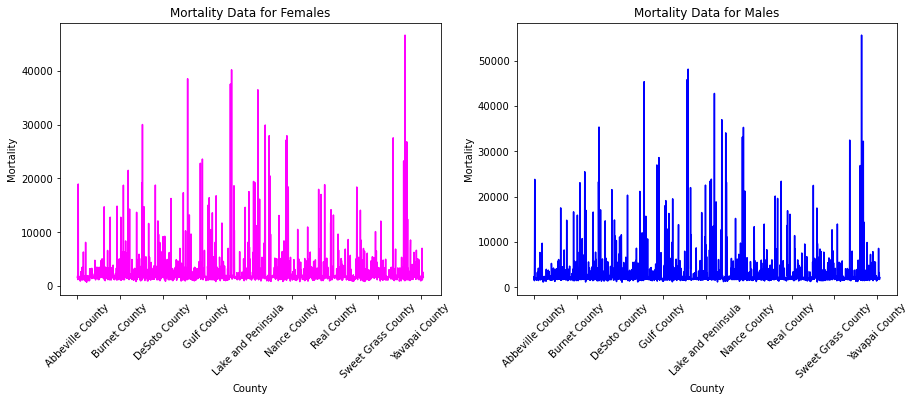

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
by_county = Females.groupby('LocationDesc').sum()
by_county['Data_Value'].plot.line(colormap='spring')
plt.xticks(rotation=45)
plt.title('Mortality Data for Females')
plt.ylabel('Mortality')
plt.xlabel('County')

plt.subplot(1, 2, 2)
by_county = Males.groupby('LocationDesc').sum()
by_county['Data_Value'].plot.line(colormap='winter')
plt.xticks(rotation=45)

plt.title('Mortality Data for Males')
plt.ylabel('Mortality')
plt.xlabel('County')

plt.show()

From the graphs we can see that mortality data varies across the counties for the two genders. The highest peaks for Males are higher than the highest peaks for females. We can also see from the highest peaks on the two graphs that for some counties, mortality is really high. However this is not enough to figure out which gender is at a higher risk. 

Research shows that heart disease is the leading cause of death for women as well as men. Although men tend to develop coronary artery disease earlier in life, after age 65 the risk of heart disease in women is almost the same as in men. One of the reasons why the mean mortality rate for men is higher in this data set could be due to the age group of the sample (i.e majority of women in the sample are younger than men).  

Women have many of the same risk factors for heart disease as men, such as smoking, high blood pressure, and high cholesterol.
Diabetes is a particularly important risk factor for developing heart disease in women. In order to compare the genders, we must do some more digging into the date. 

Doing some research on counties provided some interesting facts. We can see that the Orange County has one of the lowest mortality rates. It was found that the median household income in 2007 for Orange County was $ 61,899.

For Cowley county and Neshoba County, with one of the highest mortality rates, the median household income was found to be below $40,000, with around 20% of the population living below the poverty line. 

Even though Orange County is one of the most populated counties of California, it had a lower mortality rate, indiciating that there may be a correlation between household income and mortality rate.



To address the differences in gender on heart rate mortality, the data needs to be analyzed further. Lets explore gender variation across the different races.


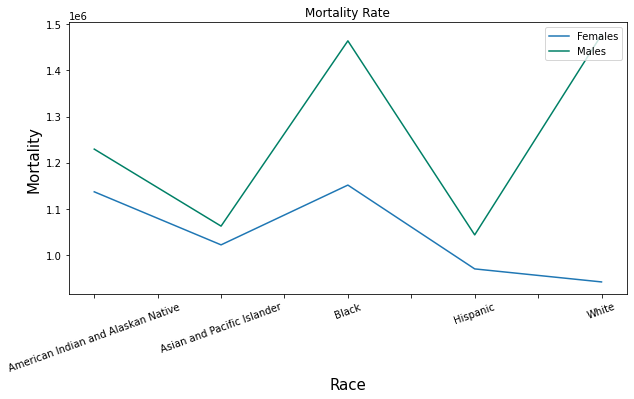

In [130]:
plt.figure(figsize=(10,5))
Femalesby_race = Females.groupby('Stratification2').sum()
Femalesby_race['Data_Value'].plot.line()
Malesby_race = Males.groupby('Stratification2').sum()
Malesby_race['Data_Value'].plot.line(colormap = 'summer')
plt.xticks(rotation=20)
plt.title('Mortality Rate')
plt.ylabel('Mortality', fontsize = 15 )
plt.xlabel('Race', fontsize = 15 )
plt.legend(["Females", "Males"], loc ="upper right")

plt.show()

Conclusion

It is important to study the gender differences in cardiovascular disease for the prevention, diagnosis, treatment and management of Heart Disease. 

We can see from the graph that for all races, males indeed have a higher mortality rate than females. The difference in mortality rates for the two genders are the highest for White, followed by Black. For other races they are relatively closer to each other.  

Men and Women share some classis risk factor for heart disease such as age, hypertension, total cholesterol and low-density lipoprotein (LDL)-cholesterol, but these have a great influence in men. But smoking, diabetes, triglyceride and high-density lipoprotein (HDL)-cholesterol levels mainly have effect on women. For women, cardiovascular disease is also affected by some female-specific risk factors. These variations in risk factors explain why there is a variation in the mortality race across the two genders. 

Another interesting thing to note is that the mortality rate for White females is much lower than other races, while the mortality rate for White males is the highest among other races. This gender disparity in White adults could be due to outliers, so this needs to explored a little bit more. 

Doing some research confirms that black women, are indeed at ahigher chance of dying from heart disease compared to white women, according to the National Heart, Lung, and Blood Institute. Next steps would be to study the race variations across the two genders. 